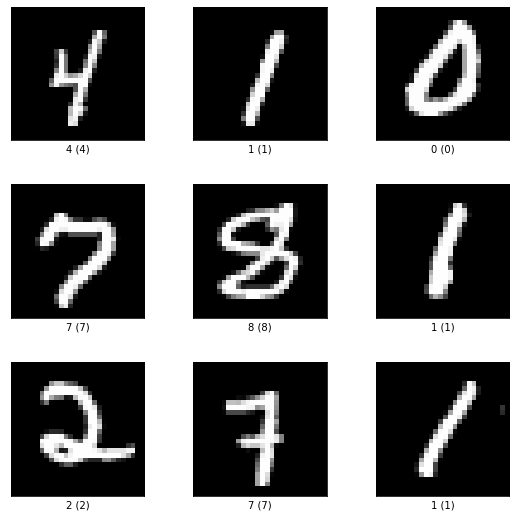

In [1]:
import tensorflow_datasets as tfds

train_dataset, test_dataset = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(train_dataset, test_dataset)

In [9]:
import pandas as pd

df = tfds.as_dataframe(train_dataset.take(10000))


df_test = df[9900:]
df_train = df[:9900]

df.head()

,image,label
0,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",4
1,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",1
2,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0
3,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",7
4,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",8


**So the data is now in a dataframe. The first column is just a count to see how many digits are in the dataset. The second column is where the image information is stored. It is a 28x28 image so the values in the array correspond to the pixel value. The third column is the label of the digit to use for classification.**

Is the distribution of digits equal? Is there a bias?


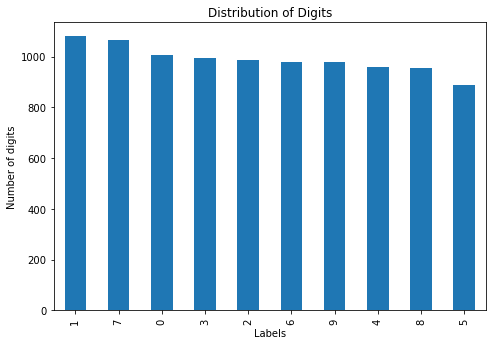

In [3]:
import matplotlib.pyplot as plt

print('Is the distribution of digits equal? Is there a bias?')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of digits')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Digits')
numDigits = df_train['label'].value_counts()
numDigits.plot.bar()

In [4]:
import numpy as np

x_train = df_train[["image"]]
y_train = df_train[["label"]]

flattened_array = np.concatenate(np.concatenate(x_train.to_numpy()))

# x_train_mean = np.mean(flattened_array)
# x_train_std = np.std(flattened_array)
# x_train_st = (flattened_array - x_train_mean) / x_train_std

np.shape(flattened_array)
train_arr = np.concatenate(flattened_array).reshape(9900, 784)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sys

scaler = StandardScaler()
X_train_st = scaler.fit_transform(train_arr)
y_train = df_train[["label"]]

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X=X_train_st, y=y_train.to_numpy().ravel())

pred_array = []
accuracy = 0.0

for i in range(100):
    x_new = df_test.loc[9900+i, ["image"]]
    x_new = np.concatenate(np.concatenate(x_new.to_numpy())).reshape(784)
    # Standardize the training and test data
    
    X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
    
    # Fit k-nearest neighbors
    model.predict(X=X_new_st)
    
    pred_array.append(model.predict(X=X_new_st))
    if pred_array[i][0] == df_test.loc[9900+i, ["label"]][0]:
        accuracy = accuracy + 1
accuracy

91.0